In [ ]:
# # ### Shell
'''
for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo280k-ratio.xvg" ]; then
        grep -v '^#' "$dir/dpdo280k-ratio.xvg" >> dpdo280k-ratio_10us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo280k-rawdata.xvg" ]; then
        grep -v '^#' "$dir/dpdo280k-rawdata.xvg" >> dpdo280k-rawdata_10us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo290k-ratio.xvg" ]; then
        grep -v '^#' "$dir/dpdo290k-ratio.xvg" >> dpdo290k-ratio_10us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo290k-rawdata.xvg" ]; then
        grep -v '^#' "$dir/dpdo290k-rawdata.xvg" >> dpdo290k-rawdata_10us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdochl280k-ratio.xvg" ]; then
        grep -v '^#' "$dir/dpdochl280k-ratio.xvg" >> dpdochl280k-ratio_8us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdochl280k-rawdata.xvg" ]; then
        grep -v '^#' "$dir/dpdochl280k-rawdata.xvg" >> dpdochl280k-rawdata_8us_raw.xvg
    fi
done


for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdochl290k-ratio.xvg" ]; then
        grep -v '^#' "$dir/dpdochl290k-ratio.xvg" >> dpdochl290k-ratio_9us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdochl290k-rawdata.xvg" ]; then
        grep -v '^#' "$dir/dpdochl290k-rawdata.xvg" >> dpdochl290k-rawdata_9us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/psmdopochl-ratio.xvg" ]; then
        grep -v '^#' "$dir/psmdopochl-ratio.xvg" >> psmdopochl-ratio_20us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/psmdopochl-rawdata.xvg" ]; then
        grep -v '^#' "$dir/psmdopochl-rawdata.xvg" >> psmdopochl-rawdata_20us_raw.xvg
    fi
done
'''

# Proportion of Lipid Count in Lo Phase Over Time

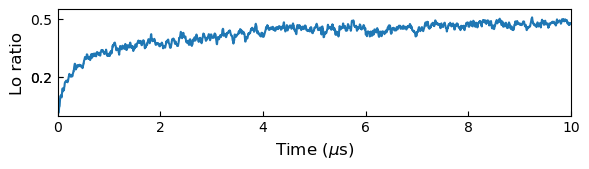

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Read .xvg data file
def read_xvg(file_path):
    """
    Read a .xvg file.
    The first column is the time label, and the remaining columns are lipid state labels (0 or 1).
    """
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            # Skip comment lines
            if line.startswith('#') or line.startswith('@'):
                continue
            data.append(list(map(float, line.split())))  # Parse data line
    return np.array(data)

# Calculate the proportion of label 1
def calculate_ratio(data):
    """
    Input: data array.
    Output: ratio of label 1 for each time point.
    """
    time = data[:, 0] / 1000  # First column is time (converted to microseconds)
    lipid_states = data[:, 1:577]  # upper leaflet
    # lipid_states = data[:, 577:1153]  # lower leaflet
    ratio = np.mean(lipid_states, axis=1)  # Fraction of label 1 (column mean)
    return time, ratio

# Plot the ratio over time
def plot_ratio(time, ratio):
    """
    Plot time vs. proportion of label 1.
    """
    plt.figure(figsize=(6, 1.8))
    plt.plot(time, ratio, label='Proportion of Label 1')  # , color='blue'
    plt.xlim(0, 10)
    plt.ylim(0, 0.55)
    plt.xticks(range(0, 11, 2))
    plt.yticks([0.2, 0.5, 0.2])
    plt.xlabel(r'Time ($\mu$s)', fontsize=12)
    plt.ylabel('Lo ratio', fontsize=12)
    plt.title('', fontsize=14)
    # plt.legend(fontsize=10)
    
    plt.tick_params(direction='in')
    plt.tight_layout()
    plt.show()

# File path
file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-rawdata_10us_raw.xvg'  # file path
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-rawdata_8us_raw.xvg'  # file path
data = read_xvg(file_path)
time, ratio = calculate_ratio(data)
plot_ratio(time, ratio)


# Temporal Evolution of Lipid Domain Area Fractions (Lo/Ld and Registration States)

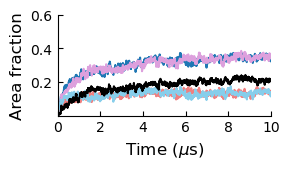

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    """
    Read the data file, skip comment lines, and return as a NumPy array.
    """
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@')):  # skip comment lines
                data.append(list(map(float, line.split())))
    return np.array(data)

def process_data(data):
    """
    Process the data: separate time column and area fraction columns,
    and calculate registration ratios.
    """
    time = data[:, 0]
    u_Lo_ratio = data[:, 1]
    l_Lo_ratio = data[:, 2]
    u_Lo_l_Lo_ratio = data[:, 3]
    u_Ld_l_Ld_ratio = data[:, 4]
    u_Lo_l_Ld_ratio = data[:, 5]
    u_Ld_l_Lo_ratio = data[:, 6]
 
    return time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio

def plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, registration_ratio):
    """
    Plot the time evolution of area fractions.
    """
    fig, ax = plt.subplots(figsize=(3, 1.8))
    # fig, ax = plt.subplots(figsize=(6, 1.8))  # for psm

    time = time / 1000  # convert ns to μs

    # Define colors
    colors = {
        'u_Lo': '#1f77b4',         # blue
        'l_Lo': '#DDA0DD',         # purple
        'u_Ld_l_Lo': 'lightcoral', # light red
        'u_Lo_l_Ld': 'skyblue',    # light blue
        'registration': 'black'    # black
    }

    # Plot lines
    # plt.plot(time, u_Lo_ratio, label='u, Lo', color=colors['u_Lo'])
    # plt.plot(time, l_Lo_ratio, label='l, Lo', color=colors['l_Lo'])
    # plt.plot(time, u_Ld_l_Lo_ratio, label='u, Ld; l, Lo', color=colors['u_Ld_l_Lo'])
    # plt.plot(time, u_Lo_l_Ld_ratio, label='u, Lo; l, Ld', color=colors['u_Lo_l_Ld'])

    plt.plot(time, u_Lo_ratio, label='u, gel', color=colors['u_Lo'])
    plt.plot(time, l_Lo_ratio, label='l, gel', color=colors['l_Lo'])
    plt.plot(time, u_Ld_l_Lo_ratio, label=r'u, L$\alpha$; l, gel', color=colors['u_Ld_l_Lo'])
    plt.plot(time, u_Lo_l_Ld_ratio, label=r'u, gel; l, L$\alpha$', color=colors['u_Lo_l_Ld'])

    plt.plot(time, registration_ratio, label='Registration', color=colors['registration'])

    plt.ylim(0, 0.6)
    plt.yticks(np.arange(0.2, 0.61, 0.2))
    
    plt.xlim(0, 10)              # dpdo
    plt.xticks(range(0, 11, 2))

    # plt.xlim(0, 8)                 # dpdochl280k
    # plt.xticks(np.arange(0, 9, 2))

    # plt.xlim(0, 9)               # dpdochl290k
    # plt.xticks(np.arange(0, 10, 2))

    # plt.xlim(0, 20)              # psm
    # plt.xticks(range(0, 21, 4))

    # Axis labels and style
    plt.xlabel(r'Time ($\mu$s)', fontsize=12)
    plt.ylabel('Area fraction', fontsize=12)
    plt.title('', fontsize=14)

    # Optional: legend below plot
    # plt.legend(
    #     fontsize=8, 
    #     loc='upper left', 
    #     bbox_to_anchor=(0,1.1),
    #     ncol=5, 
    #     frameon=False,
    #     labelspacing=0.05,
    #     columnspacing=0.5,
    #     handlelength=0.5,
    #     handletextpad=0.2
    # )

    # Hide top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tick_params(direction='in')
    plt.tight_layout()

    # Save figure
    plt.savefig(
        f'/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/{sys}-time2AreaF.png',
        dpi=350,
        format='png',
        bbox_inches='tight',
        pad_inches=0.0,
        transparent=True,
    )

# Example usage:
sys = 'dpdo280k'
file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-ratio_10us_raw.xvg'
# sys = 'dpdo290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo290k/dpdo290k-ratio_10us_raw.xvg'

# sys = 'dpdochl280k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-ratio_8us_raw.xvg'
# sys = 'dpdochl290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/dpdochl290k-ratio_9us_raw.xvg'

# sys = 'psmdopochl'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/psmdopochl/psmdopochl-ratio_20us_raw.xvg'

data = read_data(file_path)
time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio = process_data(data)

# Plot figure
plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, u_Lo_l_Lo_ratio)


# Local

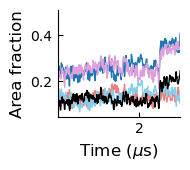

In [55]:
import matplotlib.pyplot as plt
import numpy as np
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@')):  # 跳过注释行
                data.append(list(map(float, line.split())))
    return np.array(data)
def process_data(data):

    time = data[:, 0]
    u_Lo_ratio = data[:, 1]
    l_Lo_ratio = data[:, 2]
    u_Lo_l_Lo_ratio = data[:, 3]
    u_Ld_l_Ld_ratio = data[:, 4]
    u_Lo_l_Ld_ratio = data[:, 5]
    u_Ld_l_Lo_ratio = data[:, 6]
 
    return time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio

def plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, registration_ratio):

    fig,ax = plt.subplots(figsize=(2, 1.8))

    time = time/1000     #others

    # 指定颜色
    colors = {
        'u_Lo': '#1f77b4',       
        'l_Lo': '#DDA0DD',      
        'u_Ld_l_Lo': 'lightcoral',
        'u_Lo_l_Ld': 'skyblue', 
        'registration': 'black' 
    }

    # 绘制折线
    plt.plot(time, u_Lo_ratio, label='u, Lo', color=colors['u_Lo'], linewidth = 1)
    plt.plot(time, l_Lo_ratio, label='l, Lo', color=colors['l_Lo'], linewidth = 1)
    plt.plot(time, u_Ld_l_Lo_ratio, label='u, Ld; l, Lo', color=colors['u_Ld_l_Lo'], linewidth = 1)
    plt.plot(time, u_Lo_l_Ld_ratio, label='u, Lo; l, Ld', color=colors['u_Lo_l_Ld'], linewidth = 1)
    plt.plot(time, registration_ratio, label='Registration', color=colors['registration'], linewidth = 1)


    # plt.ylim(0, 0.3)        # dpdo
    # plt.yticks(np.arange(0.2, 0.31, 0.2))

    # plt.ylim(0, 0.4)         # dpdo280k
    # plt.yticks(np.arange(0.2, 0.41, 0.2))
    
    # plt.xlim(0, 2)              # dpdo
    # plt.xticks(range(1, 3, 1))

    plt.xlim(0, 3)               # dpdochl2280k
    plt.xticks(np.arange(2, 4, 2))
    # plt.xlim(0, 20)              # psm
    # plt.xticks(range(0, 21, 4))
 
    plt.xlabel(r'Time ($\mu$s)', fontsize=12)
    plt.ylabel('Area fraction', fontsize=12)
    plt.title('', fontsize=14)
    # plt.text(0, 1.1, sys, 
    #         fontsize=12, fontweight='bold', ha='left', transform=plt.gca().transAxes)

    # plt.legend(
    #     fontsize=8, 
    #     loc='upper left', 
    #     bbox_to_anchor=(0,1.1),  
    #     ncol=5, 
    #     frameon=False,
    #     labelspacing=0.05,   
    #     columnspacing=0.5,    
    #     handlelength=0.5,   
    #     handletextpad=0.2   
    # )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(direction='in')
    plt.tight_layout()

    # plt.show()
    plt.savefig(
        '/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/'+sys+'-time2AreaF_local.png',        # 文件名
        dpi=350,          
        format='png',     
        bbox_inches='tight',
        pad_inches=0.0,     
        # facecolor='white',  
        # edgecolor='black',
        transparent=True,   
        # metadata={'Author': 'Your Name'} 
    )
# sys = 'dpdo280k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-ratio_10us_raw.xvg'
# sys = 'dpdo290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo290k/dpdo290k-ratio_10us_raw.xvg'

sys = 'dpdochl280k'
file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-ratio_8us_raw.xvg'

# sys = 'dpdochl290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/dpdochl290k-ratio_9us_raw.xvg'

# sys = 'psmdopochl'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/psmdopochl/psmdopochl-ratio_20us_raw.xvg'



# data = read_data(file_path1)
# time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio = process_data(data)

# plot_data(time, u_Lo_ratio, l_Lo_ratio, u_Ld_l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Ld_ratio)


data = read_data(file_path)
time, u_Lo_ratio, sl_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio = process_data(data)

plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, u_Lo_l_Lo_ratio)



# -Scd as a function of time

In [11]:
sys = 'dpdo280k'
phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-rawdata_10us_raw.xvg'
phase = np.loadtxt(phase_file)[:,1:]
scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/full_time_scd/dpdo280k_scd_10us_gap5.xvg'
scd = np.loadtxt(scd_file)[:,:]
time = np.loadtxt(phase_file)[:,0]/1000

# sys= 'dpdochl280k'
# phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-rawdata_8us_raw.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# scd_file = '/data/gulab/yzdai/data4/atomdensity/plot_data/full_time_scd/dpdochl280k_scd_8us_gap5.xvg'
# scd = np.loadtxt(scd_file)[:,:]
# time = np.loadtxt(phase_file)[:,0]/1000

# sys= 'dpdochl290k'
# phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/dpdochl290k-rawdata_9us_raw.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# print(phase.shape)
# scd_file = '/data/gulab/yzdai/data4/atomdensity/plot_data/full_time_scd/dpdochl290k_scd_9us_gap5.xvg'
# scd = np.loadtxt(scd_file)[:,:]
# time = np.loadtxt(phase_file)[:,0]/1000

[0.3878159851301115, 0.39300130841121494, 0.390840625, 0.3903114180478821, 0.38909742647058826, 0.3878012891344383, 0.3851659340659341, 0.39055683060109286, 0.39155063752276864, 0.3867448087431694]
[0.22006, 0.27634, 0.32557, 0.329075, 0.3183076923076923, 0.31372222222222224, 0.2905875, 0.3148450980392157, 0.3255365384615384, 0.33395538461538465]


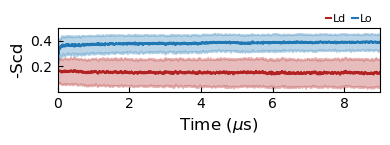

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


scd_class0 = []; 
scd_class1 = []
time_n0 = []
time_n1 = []
for n_fr in range(len(scd)):
    scd_class0_n_fr = []
    scd_class1_n_fr = []
    time_n_fr0 = []
    time_n_fr1= []
    for n_lip in range(len(scd[0])):
        if phase[n_fr][n_lip] == 0:
            scd_class0_n_fr.append(scd[n_fr][n_lip])
            time_n_fr0.append(time[n_fr])
        else:
            scd_class1_n_fr.append(scd[n_fr][n_lip])
            time_n_fr1.append(time[n_fr])
    scd_class0.append(scd_class0_n_fr)
    scd_class1.append(scd_class1_n_fr)
    time_n0.append(time_n_fr0)
    time_n1.append(time_n_fr1)
# scd_class0 = [item for sublist in scd_class0 for item in sublist]
# scd_class1 = [item for sublist in scd_class1 for item in sublist]
# time_n0 = [item for sublist in time_n0 for item in sublist]
# time_n1 = [item for sublist in time_n1 for item in sublist]


mean_class0 = [np.mean(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
               for scd_class0_n_fr in scd_class0]
std_class0 = [np.std(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
              for scd_class0_n_fr in scd_class0]

mean_class1 = [np.mean(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
               for scd_class1_n_fr in scd_class1]
std_class1 = [np.std(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
              for scd_class1_n_fr in scd_class1]
print(mean_class1[-10:])
print(mean_class1[:10])

fig, ax = plt.subplots(figsize=(4, 1.5))


ax.plot(time, mean_class0, label="Ld", color="#B22222")
ax.fill_between(time, np.array(mean_class0) - np.array(std_class0), np.array(mean_class0) + np.array(std_class0), \
                color="#B22222", alpha=0.3)


ax.plot(time, mean_class1, label="Lo", color='#1f77b4')
ax.fill_between(time, np.array(mean_class1) - np.array(std_class1), np.array(mean_class1) + np.array(std_class1), \
                color="#1f77b4", alpha=0.3)

plt.xlabel(r'Time ($\mu$s)', fontsize=12)
plt.ylabel('-Scd', fontsize=12)
plt.title('', fontsize=14)
# plt.text(0, 1.1, sys, 
#         fontsize=12, fontweight='bold', ha='left', transform=plt.gca().transAxes)

plt.legend(
    fontsize=8, 
    loc='lower left', 
    bbox_to_anchor=(0.8,0.9),  
    ncol=5, 
    frameon=False,
    labelspacing=0.05,     
    columnspacing=0.5,   
    handlelength=0.5,  
    handletextpad=0.2     
)
plt.ylim(0, 0.5)
plt.yticks(np.arange(0.2, 0.51, 0.2))

# plt.xlim(0, 10)              # dpdo
# plt.xticks(range(0, 11, 2))

# plt.xlim(0, 8)              # dpdochl280k
# plt.xticks(range(0, 9, 2))

plt.xlim(0, 9)              # dpdochl290k
plt.xticks(range(0, 9, 2))

plt.tick_params(direction='in')
plt.tight_layout()

# plt.show()
# plt.savefig('/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-timie2scd.png',\
#             dpi=350)

plt.savefig(
    '/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/'+sys+'-time2scd.png',        # 文件名
    dpi=350,            
    format='png',      
    bbox_inches='tight', 
    pad_inches=0.0,     
    # facecolor='white',  
    # edgecolor='black', 
    transparent=True,  
    # metadata={'Author': 'Your Name'}  
)

10
10


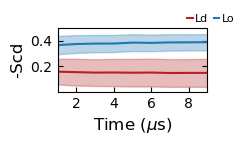

In [13]:

scd_class0_us = []
scd_class1_us = []
time_us = []
fr_per_us = 200
num_us = len(scd) // fr_per_us
print(num_us)

for i in range(num_us):

    start_idx = i * fr_per_us
    end_idx = (i + 1) * fr_per_us

    scd_class0_us_n = []
    scd_class1_us_n = []
    for n_fr in range(start_idx, end_idx):
        scd_class0_n_fr = []
        scd_class1_n_fr = []

        for n_lip in range(len(scd[0])):
            if phase[n_fr][n_lip] == 0:
                scd_class0_n_fr.append(scd[n_fr][n_lip])
            else:
                scd_class1_n_fr.append(scd[n_fr][n_lip])
        scd_class0_us_n.extend(scd_class0_n_fr)
        scd_class1_us_n.extend(scd_class1_n_fr)

    scd_class0_us.append(scd_class0_us_n)
    scd_class1_us.append(scd_class1_us_n)
    time_us.append(time[start_idx]+1)

mean_class0 = [np.mean(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
               for scd_class0_n_fr in scd_class0_us]
print(len(mean_class0))
std_class0 = [np.std(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
              for scd_class0_n_fr in scd_class0_us]

mean_class1 = [np.mean(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
               for scd_class1_n_fr in scd_class1_us]
std_class1 = [np.std(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
              for scd_class1_n_fr in scd_class1_us]

fig, ax = plt.subplots(figsize=(2.5, 1.5))


ax.plot(time_us, mean_class0, label="Ld", color="#B22222")
ax.fill_between(time_us, np.array(mean_class0) - np.array(std_class0), np.array(mean_class0) + np.array(std_class0), \
                color="#B22222", alpha=0.3)


ax.plot(time_us, mean_class1, label="Lo", color='#1f77b4')
# ax.plot(time_us, [0.4 for x in range(10)], color='grey')
# ax.plot(time_us, [0.2 for x in range(10)], color='grey')
ax.fill_between(time_us, np.array(mean_class1) - np.array(std_class1), np.array(mean_class1) + np.array(std_class1), \
                color="#1f77b4", alpha=0.3)

plt.xlabel(r'Time ($\mu$s)', fontsize=12)
plt.ylabel('-Scd', fontsize=12)
plt.title('', fontsize=14)
# plt.text(0, 1.1, sys, 
#         fontsize=12, fontweight='bold', ha='left', transform=plt.gca().transAxes)

plt.legend(
    fontsize=8, 
    loc='lower left', 
    bbox_to_anchor=(0.8,0.9),
    ncol=5, 
    frameon=False,
    labelspacing=0.05,    
    columnspacing=0.5,    
    handlelength=0.5,    
    handletextpad=0.2   
)
plt.ylim(0, 0.5)
plt.yticks(np.arange(0.2, 0.51, 0.2))

# plt.xlim(1, 10)              # dpdo
# plt.xticks(range(2, 11, 2))

# plt.xlim(1, 8)              # dpdochl280k
# plt.xticks(range(2, 9, 2))

plt.xlim(1, 9)              # dpdochl280k
plt.xticks(range(2, 9, 2))

ax.tick_params(axis='y', which='both', right=True, labelright=False)

plt.tick_params(direction='in')
plt.tight_layout()
# 显示图表
# plt.show()
# plt.savefig('/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-timie2scd.png',\
#             dpi=350)
# # 保存图像，指定参数
# plt.savefig(
#     '/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-time2scd.png',        # 文件名
#     dpi=350,             # 分辨率
#     format='png',        # 文件格式
#     bbox_inches='tight', # 自动调整边界框
#     pad_inches=0.0,      # 边界填充
#     # facecolor='white',   # 背景颜色
#     # edgecolor='black',   # 边缘颜色
#     transparent=True,   # 是否透明背景
#     # metadata={'Author': 'Your Name'}  # 元数据
# )


<Figure size 160x200 with 0 Axes>

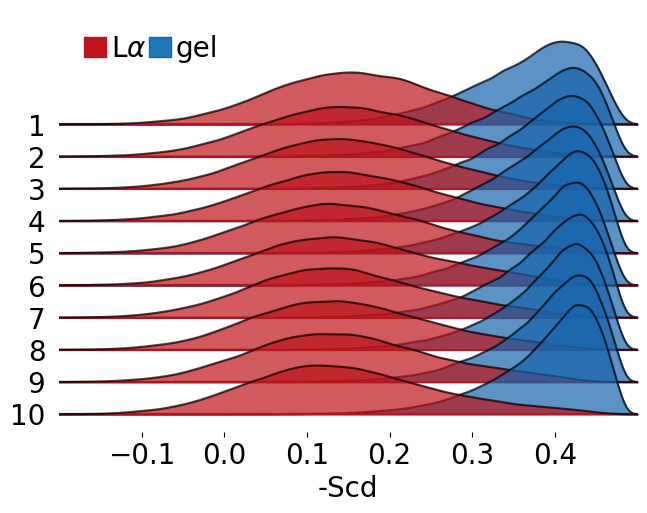

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot
import matplotlib.patches as mpatches

df = pd.DataFrame(columns=["Time", "Lo", "Ld"])

data = []
for i, (scd_class0_n, scd_class1_n) in enumerate(zip(scd_class0_us, scd_class1_us)):
    for value_lo, value_ld in zip(scd_class1_n, scd_class0_n): 
        data.append([i + 1, value_lo, value_ld])

df = pd.DataFrame(data, columns=["Time", "Lo", "Ld"])

df["Time"] = df["Time"].astype("category")

plt.figure(figsize=(1.6, 2))
fig, axes = joyplot(
    data=df,
    by="Time", 
    column=["Lo", "Ld"], 
    color=[plt.cm.Blues(0.8), plt.cm.Reds(0.8)], 
    # legend=True,
    alpha=0.7,
    # x_range=[0, 0.5],                              #dpdochl     
    x_range=[-0.2, 0.5],                             #dpdo
    overlap = 1.5
)

# 创建自定义的图例项
class0_patch = mpatches.Patch(color=plt.cm.Reds(0.8), label="L$\\alpha$")  #dpdo
class1_patch = mpatches.Patch(plt.cm.Blues(0.8), label="gel")

# class0_patch = mpatches.Patch(color=plt.cm.Reds(0.8), label="Ld")        #dpdochl
# class1_patch = mpatches.Patch(plt.cm.Blues(0.8), label="Lo")

# plt.legend(handles=[class0_patch, class1_patch], title="Legend", loc="upper right")

for ax in axes:
    ax.tick_params(axis='x', labelsize=20) 
    ax.tick_params(axis='y', labelsize=20)
plt.legend(
    handles=[class0_patch, class1_patch],
    fontsize=20, 
    loc='upper left', 
    # bbox_to_anchor=(-0.12,3), 
    ncol=2, 
    frameon=False,
    labelspacing=0.05,     
    columnspacing=0.1,
    handlelength=0.8,   
    handletextpad=0.15,   
)
plt.xlabel("-Scd", fontsize=20)
plt.ylabel("Time Points")
# plt.xticks(fontsize=15) 
# plt.yticks(fontsize=15) 
plt.savefig(
'/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/'+sys+'-time2scd_distr.png', 
dpi=350,           
format='png',       
bbox_inches='tight',
pad_inches=0.0,     
# facecolor='white',  
# edgecolor='black', 
transparent=True, 
) 